In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, HTML,clear_output
import joblib

In [53]:
ProductUserdf = pd.read_csv('../input/functional-preprocess-nowindowfeaturesextraction/ALLdataProductUserdf_addedSomeFeatures_addedDummyPrediction.csv')
ProductUserdf = ProductUserdf[['user_id','product_id','LenOfList','allDiffDay','allGoneDay',
                               'dummyPrediction_goneDay','dummyPrediction_datetime']]
print(ProductUserdf.shape)
with pd.option_context('display.max_rows', 100, 'display.max_columns', 10,'max_colwidth', None):
    display(HTML(ProductUserdf.tail(3).to_html()))

(318050, 7)


,user_id,product_id,LenOfList,allDiffDay,allGoneDay,dummyPrediction_goneDay,dummyPrediction_datetime
318047,45471482,1945563,4,"[nan, 10.0, 18.0, 146.0]","[47, 57, 75, 221]",279.0,2019-10-07
318048,45471482,3309954,4,"[nan, 8.0, 3.0, 4.0]","[303, 311, 314, 318]",323.0,2019-11-20
318049,45471482,4563945,7,"[nan, 3.0, 13.0, 12.0, 12.0, 1.0, 4.0]","[273, 276, 289, 301, 313, 314, 318]",325.5,2019-11-22


### "LenOfList" is number of purchases per user-products.

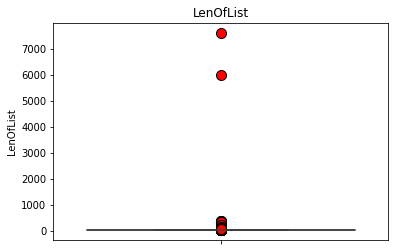

In [54]:
ax=sns.boxplot(data=ProductUserdf,y='LenOfList', showfliers = True,
                          flierprops={"marker":"o",
                                   "markerfacecolor":"red", 
                                   "markeredgecolor":"black",
                                      "markersize":"10"})
ax.set(title='LenOfList');

In [55]:
#two Outliers more that 5000
ProductUserdf[ProductUserdf['LenOfList']>5000]

,user_id,product_id,LenOfList,allDiffDay,allGoneDay,dummyPrediction_goneDay,dummyPrediction_datetime
303044,29623462,2998166,5986,"[nan, 9.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[1, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10...",187.031078,2019-07-07
303045,29623462,3900219,7618,"[nan, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 1...",187.023237,2019-07-07


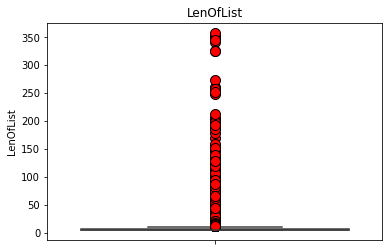

In [56]:
#other outlier and data less than 5000
ax=sns.boxplot(data=ProductUserdf[ProductUserdf['LenOfList']<5000],y='LenOfList', showfliers = True,
                          flierprops={"marker":"o",
                                   "markerfacecolor":"red", 
                                   "markeredgecolor":"black",
                                      "markersize":"10"})
ax.set(title='LenOfList');

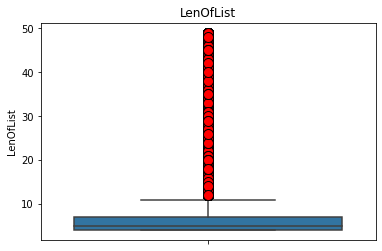

In [57]:
#other outlier and data less than 50
ax=sns.boxplot(data=ProductUserdf[ProductUserdf['LenOfList']<50],y='LenOfList', showfliers = True,
                          flierprops={"marker":"o",
                                   "markerfacecolor":"red", 
                                   "markeredgecolor":"black",
                                      "markersize":"10"})
ax.set(title='LenOfList');

In [58]:
gropuedLenOfList=pd.DataFrame(ProductUserdf['LenOfList'].value_counts()).reset_index()
gropuedLenOfList.rename(columns={'index':'numberOfPurchase_userProduct','LenOfList':'count'},inplace=True)
gropuedLenOfList

,numberOfPurchase_userProduct,count
0,4,111289
1,5,65470
2,6,39877
3,7,26467
4,8,17647
...,...,...
140,353,1
141,203,1
142,134,1
143,100,1


In [59]:
# barchar function for seasondf
def BarChart(data,y:str,x:str,title:str,colorCond:int=600000):
    #ax = sns.barplot(data=seasondf,x=seasondf.index,y='count',palette=['red','gray','green','gray'])
    ax = sns.barplot(data=data,x=x,y=y)
    #print values for each bars.
    for i in ax.containers:
        ax.bar_label(i,)
    #remove additional components from the figure.
    sns.despine(top = True, left = True)
    ax.set(yticklabels=[])
    ax.tick_params(left=False)
    # All bars become gray except one.
    for bar in ax.patches:
        if bar.get_height() > colorCond:
            bar.set_color('red')    
        else:
            bar.set_color('grey')

    ax.set(title=title);

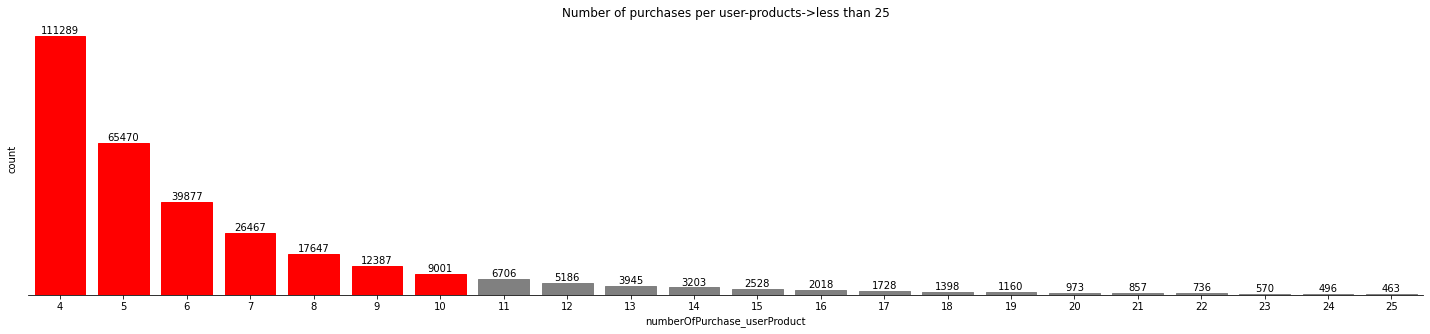

In [60]:
# numberOfPurchase_userProduct less than 25
plt.figure(figsize=(25,5))
title='Number of purchases per user-products->less than 25'
BarChart(data=gropuedLenOfList[gropuedLenOfList['numberOfPurchase_userProduct']<=25],
            x='numberOfPurchase_userProduct',y='count',title=title,colorCond=9000)

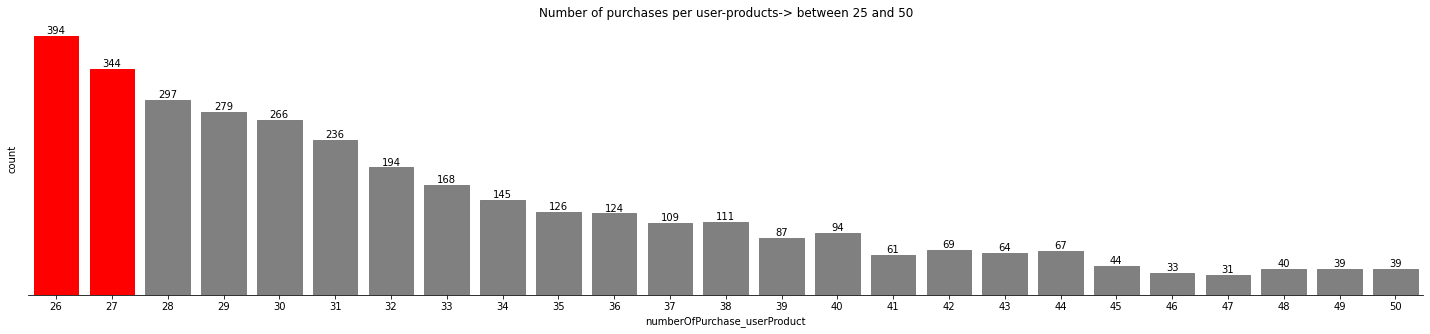

In [61]:
# numberOfPurchase_userProduct between 25 and 50
cond = (gropuedLenOfList['numberOfPurchase_userProduct']>25)&(gropuedLenOfList['numberOfPurchase_userProduct']<=50)
plt.figure(figsize=(25,5))
title='Number of purchases per user-products-> between 25 and 50'
BarChart(data=gropuedLenOfList[cond],
        x='numberOfPurchase_userProduct',
         y='count',title=title,colorCond=340)

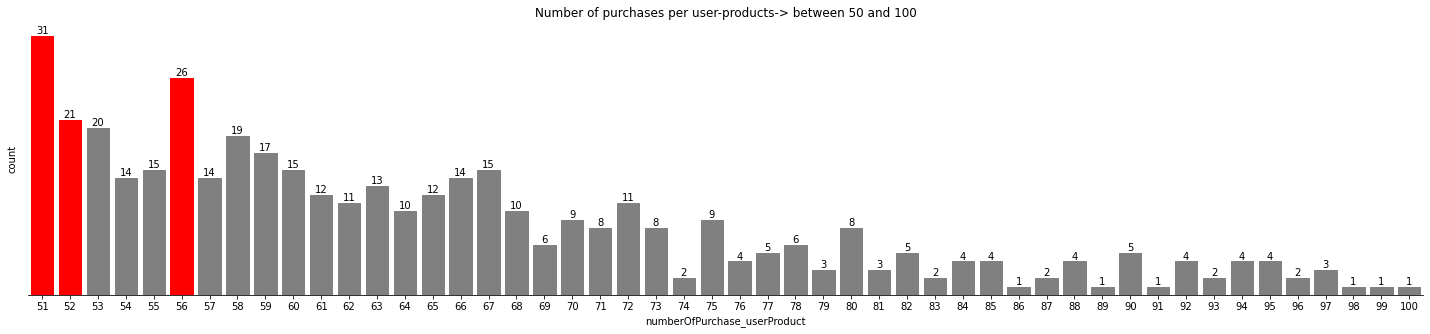

In [62]:
# numberOfPurchase_userProduct between 50 and 100
cond = (gropuedLenOfList['numberOfPurchase_userProduct']>50)&(gropuedLenOfList['numberOfPurchase_userProduct']<=100)
plt.figure(figsize=(25,5))
title='Number of purchases per user-products-> between 50 and 100'
BarChart(data=gropuedLenOfList[cond],
            x='numberOfPurchase_userProduct',y='count',title=title,colorCond=20)

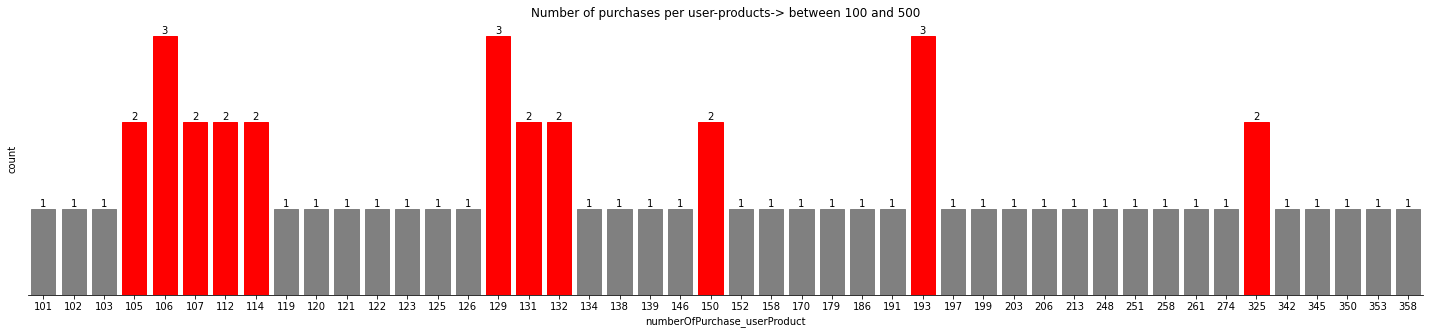

In [63]:
# numberOfPurchase_userProduct between 100 and 400
cond = (gropuedLenOfList['numberOfPurchase_userProduct']>100)&(gropuedLenOfList['numberOfPurchase_userProduct']<=500)
plt.figure(figsize=(25,5))
title='Number of purchases per user-products-> between 100 and 500'
BarChart(data=gropuedLenOfList[cond],
            x='numberOfPurchase_userProduct',y='count',title=title,colorCond=1)

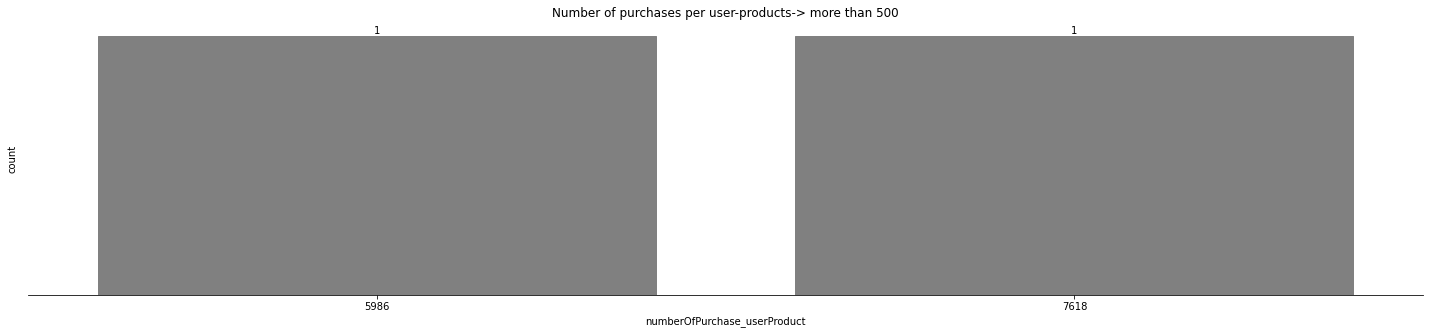

In [64]:
# numberOfPurchase_userProduct more than 500
cond = (gropuedLenOfList['numberOfPurchase_userProduct']>=500)
plt.figure(figsize=(25,5))
title='Number of purchases per user-products-> more than 500'
BarChart(data=gropuedLenOfList[cond],
            x='numberOfPurchase_userProduct',y='count',title=title,colorCond=1)

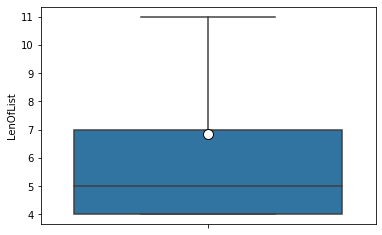

In [65]:
sns.boxplot(data=ProductUserdf,y='LenOfList', showfliers = False,showmeans=True,
            meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"10"});

In [66]:
#std of length
np.std(ProductUserdf['LenOfList'])

18.03075198743901

Most of the length(how many purchase) for every "ProductUserdf" is between 4 to 5, I choose 6 to length of window based on this [Paper](https://www.researchgate.net/publication/346846529_Using_machine_learning_to_predict_the_next_purchase_date_for_an_individual_retail_customer) (we need steady length window for all rows).

In [67]:
with pd.option_context('display.max_rows', 100, 'display.max_columns', 10,'max_colwidth', None):
    display(HTML(ProductUserdf.tail(5).to_html()))

,user_id,product_id,LenOfList,allDiffDay,allGoneDay,dummyPrediction_goneDay,dummyPrediction_datetime
318045,45431507,4375282,4,"[nan, 73.0, 21.0, 47.0]","[97, 170, 191, 238]",285.000000,2019-10-13
318046,45443053,1660612,45,"[nan, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 7.0, 0.0, 0.0, 0.0, 1.0, 12.0, 6.0, 11.0, 1.0, 1.0, 0.0, 13.0, 0.0, 3.0, 0.0, 2.0, 0.0, 1.0, 3.0, 0.0, 3.0, 4.0, 2.0, 1.0, 1.0, 0.0, 0.0, 1.0, 2.0, 4.0, 2.0, 1.0, 17.0, 0.0, 0.0, 0.0]","[253, 253, 254, 255, 256, 256, 257, 258, 258, 265, 265, 265, 265, 266, 278, 284, 295, 296, 297, 297, 310, 310, 313, 313, 315, 315, 316, 319, 319, 322, 326, 328, 329, 330, 330, 330, 331, 333, 337, 339, 340, 357, 357, 357, 357]",359.363636,2019-12-26
318047,45471482,1945563,4,"[nan, 10.0, 18.0, 146.0]","[47, 57, 75, 221]",279.000000,2019-10-07
318048,45471482,3309954,4,"[nan, 8.0, 3.0, 4.0]","[303, 311, 314, 318]",323.000000,2019-11-20
318049,45471482,4563945,7,"[nan, 3.0, 13.0, 12.0, 12.0, 1.0, 4.0]","[273, 276, 289, 301, 313, 314, 318]",325.500000,2019-11-22


In [68]:
def chunks1(lst, n):
    """Yield successive n-sized chunks from lst."""
    for i in range(len(lst),-1, -1*n):
        if i-n<0:
            yield lst[0:i]
        else:
            yield lst[i - n:i]

In [69]:

def chunks2(lst, n):
    """ n-sized chunks from a list or an array."""
    L=[]
    for i in range(len(lst),-1, -1*n):
        if i-n<0:
            if i==0:
                return L
            L.append(lst[0:i])
        else :
            L.append(lst[i - n:i])
    return L

In [70]:
#test chunk function. chunking a list or array.
#x = np.arange(50)
x=[i for i in range(49)]
print(x)
print('---------------------')
d=chunks2(x, 7)
print(d)
testdf = pd.DataFrame(d)
testdf

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48]
---------------------
[[42, 43, 44, 45, 46, 47, 48], [35, 36, 37, 38, 39, 40, 41], [28, 29, 30, 31, 32, 33, 34], [21, 22, 23, 24, 25, 26, 27], [14, 15, 16, 17, 18, 19, 20], [7, 8, 9, 10, 11, 12, 13], [0, 1, 2, 3, 4, 5, 6]]


,0,1,2,3,4,5,6
0,42,43,44,45,46,47,48
1,35,36,37,38,39,40,41
2,28,29,30,31,32,33,34
3,21,22,23,24,25,26,27
4,14,15,16,17,18,19,20
5,7,8,9,10,11,12,13
6,0,1,2,3,4,5,6


### Extracting t1 to t6 features based on window approach.

we must to convert allDiffDay and allGoneDay to a list or an array every rows, they are string of list.

In [71]:
#we must to convert allDiffDay and allGoneDay to a list or an array every rows, they are string of list.
print(ProductUserdf['allDiffDay'].iloc[1])
print(type(ProductUserdf['allDiffDay'].iloc[1]))
print('------------------------------------------------')
print(ProductUserdf['allGoneDay'].iloc[1])
print(type(ProductUserdf['allGoneDay'].iloc[1]))
print('------------------------------------------------')
ProductUserdf.info()

[nan, 25.0, 59.0, 64.0]
<class 'str'>
------------------------------------------------
[18, 43, 102, 166]
<class 'str'>
------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318050 entries, 0 to 318049
Data columns (total 7 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   user_id                   318050 non-null  int64  
 1   product_id                318050 non-null  int64  
 2   LenOfList                 318050 non-null  int64  
 3   allDiffDay                318050 non-null  object 
 4   allGoneDay                318050 non-null  object 
 5   dummyPrediction_goneDay   318050 non-null  float64
 6   dummyPrediction_datetime  318050 non-null  object 
dtypes: float64(1), int64(3), object(3)
memory usage: 17.0+ MB


In [72]:
#testing convert string of list to a numpy array.
e='[nan,2,3]'
a = np.fromstring(e[1:-1], dtype=np.float64, sep=',')
a

array([nan,  2.,  3.])

In [73]:
#test padding for list or an array.
win=7
#test = np.array([1,2,3,4,5],dtype=np.float64)
test = [1.,2.,3.,4.,5.]
print(test)
# add pad if array is less than window.
np.pad(test,(win-len(test),0),'constant',constant_values=np.nan)

[1.0, 2.0, 3.0, 4.0, 5.0]


array([nan, nan,  1.,  2.,  3.,  4.,  5.])

In [74]:
#create new chunks function by padding
def chunkingAndPadding(lst, n):
    """ n-sized chunks from a list or an array and padding it to size of n."""
    L=[]
    for i in range(len(lst),-1, -1*n):
        if i-n<0:
            if i==0:
                return L
            L.append(np.pad(lst[0:i],(n-len(lst[0:i]),0),'constant',constant_values=np.nan))
        else:
            L.append(np.pad(lst[i - n:i],(n-len(lst[i - n:i]),0),'constant',constant_values=np.nan))
    return L

In [75]:
#test chunkingAndPadding function. chunking a list or array.
#x = np.arange(50)
x=[float(i) for i in range(7)]
print(x)
print('---------------------')
d=chunkingAndPadding(x, 7)
print(d)
testdf = pd.DataFrame(d)
testdf

[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0]
---------------------
[array([0., 1., 2., 3., 4., 5., 6.])]


,0,1,2,3,4,5,6
0,0.0,1.0,2.0,3.0,4.0,5.0,6.0


In [76]:
def splitingListsAndPadding(x):
    """
    This function use in pandas apply function.
    It helps to split Lists(allDiffDay,allGoneDay).
    """
    win=7 # maximum size to split.
    
    #convert string to an array
    arr1 = np.fromstring(x['allDiffDay'][1:-1], dtype=np.float64, sep=',')
    arr2 = np.fromstring(x['allGoneDay'][1:-1], dtype=np.float64, sep=',')
    
    x['splitted_allDiffDay']= chunkingAndPadding(arr1,win)
    x['splitted_allGoneDay']= chunkingAndPadding(arr2,win)
    return x
        

Testing "splitingListsAndPadding" for a limited dateFrame.

In [77]:

df = ProductUserdf.iloc[:10].copy()
df = df.apply(splitingListsAndPadding,axis=1)
with pd.option_context('display.max_rows', 100, 'display.max_columns', 10,'max_colwidth', None):
    display(HTML(df.to_html()))

,user_id,product_id,LenOfList,allDiffDay,allGoneDay,dummyPrediction_goneDay,dummyPrediction_datetime,splitted_allDiffDay,splitted_allGoneDay
0,577243,724112,5,"[nan, 12.0, 28.0, 55.0, 13.0]","[71, 83, 111, 166, 179]",206.000000,2019-07-26,"[[nan, nan, nan, 12.0, 28.0, 55.0, 13.0]]","[[nan, nan, 71.0, 83.0, 111.0, 166.0, 179.0]]"
1,577243,875550,4,"[nan, 25.0, 59.0, 64.0]","[18, 43, 102, 166]",215.333333,2019-08-04,"[[nan, nan, nan, nan, 25.0, 59.0, 64.0]]","[[nan, nan, nan, 18.0, 43.0, 102.0, 166.0]]"
2,577243,895941,11,"[nan, 7.0, 5.0, 10.0, 3.0, 71.0, 52.0, 5.0, 8.0, 55.0, 112.0]","[18, 25, 30, 40, 43, 114, 166, 171, 179, 234, 346]",378.800000,2020-01-14,"[[3.0, 71.0, 52.0, 5.0, 8.0, 55.0, 112.0], [nan, nan, nan, nan, 7.0, 5.0, 10.0]]","[[43.0, 114.0, 166.0, 171.0, 179.0, 234.0, 346.0], [nan, nan, nan, 18.0, 25.0, 30.0, 40.0]]"
3,577243,895955,4,"[nan, 99.0, 158.0, 12.0]","[32, 131, 289, 301]",390.666667,2020-01-26,"[[nan, nan, nan, nan, 99.0, 158.0, 12.0]]","[[nan, nan, nan, 32.0, 131.0, 289.0, 301.0]]"
4,577243,896036,12,"[nan, 10.0, 6.0, 7.0, 18.0, 18.0, 10.0, 31.0, 29.0, 4.0, 122.0, 25.0]","[2, 12, 18, 25, 43, 61, 71, 102, 131, 135, 257, 282]",307.454545,2019-11-04,"[[18.0, 10.0, 31.0, 29.0, 4.0, 122.0, 25.0], [nan, nan, nan, 10.0, 6.0, 7.0, 18.0]]","[[61.0, 71.0, 102.0, 131.0, 135.0, 257.0, 282.0], [nan, nan, 2.0, 12.0, 18.0, 25.0, 43.0]]"
5,577243,896067,4,"[nan, 59.0, 20.0, 103.0]","[52, 111, 131, 234]",294.666667,2019-10-22,"[[nan, nan, nan, nan, 59.0, 20.0, 103.0]]","[[nan, nan, nan, 52.0, 111.0, 131.0, 234.0]]"
6,577243,967949,5,"[nan, 7.0, 11.0, 191.0, 67.0]","[25, 32, 43, 234, 301]",370.000000,2020-01-06,"[[nan, nan, nan, 7.0, 11.0, 191.0, 67.0]]","[[nan, nan, 25.0, 32.0, 43.0, 234.0, 301.0]]"
7,577243,968036,9,"[nan, 5.0, 2.0, 0.0, 8.0, 236.0, 6.0, 7.0, 12.0]","[25, 30, 32, 32, 40, 276, 282, 289, 301]",335.500000,2019-12-02,"[[2.0, 0.0, 8.0, 236.0, 6.0, 7.0, 12.0], [nan, nan, nan, nan, nan, nan, 5.0]]","[[32.0, 32.0, 40.0, 276.0, 282.0, 289.0, 301.0], [nan, nan, nan, nan, nan, 25.0, 30.0]]"
8,577243,968077,5,"[nan, 7.0, 11.0, 18.0, 82.0]","[25, 32, 43, 61, 143]",172.500000,2019-06-22,"[[nan, nan, nan, 7.0, 11.0, 18.0, 82.0]]","[[nan, nan, 25.0, 32.0, 43.0, 61.0, 143.0]]"
9,577243,968088,7,"[nan, 8.0, 3.0, 0.0, 43.0, 16.0, 29.0]","[32, 40, 43, 43, 86, 102, 131]",147.500000,2019-05-28,"[[nan, 8.0, 3.0, 0.0, 43.0, 16.0, 29.0]]","[[32.0, 40.0, 43.0, 43.0, 86.0, 102.0, 131.0]]"


In [78]:
#testing make dateframe with new features by window.
test = df['splitted_allGoneDay'].iloc[0]
print(test)
print('---------------------------------------')

testdf = pd.DataFrame(columns=[0,1,2,3,4,5,6])
display(HTML(testdf.to_html()))

print('---------------------------------------')
testdf.append(pd.DataFrame(test))

[array([ nan,  nan,  71.,  83., 111., 166., 179.])]
---------------------------------------


,0,1,2,3,4,5,6


---------------------------------------


,0,1,2,3,4,5,6
0,NaN,NaN,71.0,83.0,111.0,166.0,179.0


#### Apply the function to the entire data.

In [79]:
ProductUserdf = ProductUserdf.apply(splitingListsAndPadding,axis=1)
with pd.option_context('display.max_rows', 100, 'display.max_columns', 10,'max_colwidth', None):
    display(HTML(ProductUserdf.head().to_html()))

,user_id,product_id,LenOfList,allDiffDay,allGoneDay,dummyPrediction_goneDay,dummyPrediction_datetime,splitted_allDiffDay,splitted_allGoneDay
0,577243,724112,5,"[nan, 12.0, 28.0, 55.0, 13.0]","[71, 83, 111, 166, 179]",206.000000,2019-07-26,"[[nan, nan, nan, 12.0, 28.0, 55.0, 13.0]]","[[nan, nan, 71.0, 83.0, 111.0, 166.0, 179.0]]"
1,577243,875550,4,"[nan, 25.0, 59.0, 64.0]","[18, 43, 102, 166]",215.333333,2019-08-04,"[[nan, nan, nan, nan, 25.0, 59.0, 64.0]]","[[nan, nan, nan, 18.0, 43.0, 102.0, 166.0]]"
2,577243,895941,11,"[nan, 7.0, 5.0, 10.0, 3.0, 71.0, 52.0, 5.0, 8.0, 55.0, 112.0]","[18, 25, 30, 40, 43, 114, 166, 171, 179, 234, 346]",378.800000,2020-01-14,"[[3.0, 71.0, 52.0, 5.0, 8.0, 55.0, 112.0], [nan, nan, nan, nan, 7.0, 5.0, 10.0]]","[[43.0, 114.0, 166.0, 171.0, 179.0, 234.0, 346.0], [nan, nan, nan, 18.0, 25.0, 30.0, 40.0]]"
3,577243,895955,4,"[nan, 99.0, 158.0, 12.0]","[32, 131, 289, 301]",390.666667,2020-01-26,"[[nan, nan, nan, nan, 99.0, 158.0, 12.0]]","[[nan, nan, nan, 32.0, 131.0, 289.0, 301.0]]"
4,577243,896036,12,"[nan, 10.0, 6.0, 7.0, 18.0, 18.0, 10.0, 31.0, 29.0, 4.0, 122.0, 25.0]","[2, 12, 18, 25, 43, 61, 71, 102, 131, 135, 257, 282]",307.454545,2019-11-04,"[[18.0, 10.0, 31.0, 29.0, 4.0, 122.0, 25.0], [nan, nan, nan, 10.0, 6.0, 7.0, 18.0]]","[[61.0, 71.0, 102.0, 131.0, 135.0, 257.0, 282.0], [nan, nan, 2.0, 12.0, 18.0, 25.0, 43.0]]"


In [80]:
ProductUserdf.drop(['allDiffDay','allGoneDay'],axis=1,inplace=True)
#ProductUserdf.to_csv('ProductUserdf_splitted.csv')

### saving data to pkl format beacuase when use "to_csv" function, it convert list to string.
In the future, if someone wants to work with the data, there is no need to be involved in converting the string of the list  to a list.

In [81]:
#save data to pkl format beacuase when use "to_csv" function, it convert list to string.
joblib.dump(ProductUserdf,'ProductUserdf.pkl')

['ProductUserdf.pkl']

In [82]:
dftest1= joblib.load('/kaggle/working/ProductUserdf.pkl')
print(type(dftest1))
print(dftest1.shape)
print(type(dftest1.splitted_allDiffDay.iloc[1]))
print('-------------------------------------------------')
dftest1.head()

<class 'pandas.core.frame.DataFrame'>
(318050, 7)
<class 'list'>
-------------------------------------------------


,user_id,product_id,LenOfList,dummyPrediction_goneDay,dummyPrediction_datetime,splitted_allDiffDay,splitted_allGoneDay
0,577243,724112,5,206.000000,2019-07-26,"[[nan, nan, nan, 12.0, 28.0, 55.0, 13.0]]","[[nan, nan, 71.0, 83.0, 111.0, 166.0, 179.0]]"
1,577243,875550,4,215.333333,2019-08-04,"[[nan, nan, nan, nan, 25.0, 59.0, 64.0]]","[[nan, nan, nan, 18.0, 43.0, 102.0, 166.0]]"
2,577243,895941,11,378.800000,2020-01-14,"[[3.0, 71.0, 52.0, 5.0, 8.0, 55.0, 112.0], [na...","[[43.0, 114.0, 166.0, 171.0, 179.0, 234.0, 346..."
3,577243,895955,4,390.666667,2020-01-26,"[[nan, nan, nan, nan, 99.0, 158.0, 12.0]]","[[nan, nan, nan, 32.0, 131.0, 289.0, 301.0]]"
4,577243,896036,12,307.454545,2019-11-04,"[[18.0, 10.0, 31.0, 29.0, 4.0, 122.0, 25.0], [...","[[61.0, 71.0, 102.0, 131.0, 135.0, 257.0, 282...."


Let's continue in the next notebook.